Sometimes it is useful to display three-dimensional data in two or three dimensions using contours or color-coded regions. This is useful for when visualising satellite images or medical scans.


Content: 

- Visualise a map generated by mathematics
- Creating a "meshgrid", a map and rotations
- Mapping of Melbourne and tooltips
- Generate 3D Surface Plot, mplot3d Toolkit
- Add markers to 3D scatter plots
- Images, processing, SVD decomposition for compression of images 
- Contour plots and Images
- Stream plot of two point charges

If you want to read the content of your folder where you keep all your python notebooks:

In [1]:
import os 
print(os.getcwd()) 

%ls  


/home/user1/Data_Visualization_Python/Wednesday
 data_Module8.csv
 latest_1024_0304.jpg
 README
'Small codes'/
 sunspot.png
 teapot.obj
'Workshop 3.1 2Dand3Dvisualisation  students.ipynb'
'Workshop 3.2 Linear Regression using Least SquARES-Students.ipynb'


# Visualise a tea-pot generated by mathematics

https://trimsh.org/
    
Ok, Trimesh is a very advanced library, probably not of too much use for us, but for fun, let's import one of their  meshes and visualise it.

Trimesh is a pure Python (2.7-3.5+) library for loading and using triangular meshes with an emphasis on watertight surfaces. The goal of the library is to provide a full featured and well tested Trimesh object which allows for easy manipulation and analysis, in the style of the Polygon object in the Shapely library.  


Must install:

In [ ]:
!pip install trimesh

You could use trimesh or a similar module to quickly achieve your goal without reinventing the wheel, as such libraries already implement methods for dealing with meshes.

See below a quick implementation of a projection of a surface onto an arbitrary plane, defined by its normal vector and origin.

You will have to import Axes3D to enable the 3d plotting in matplotlib. import Axes3D


Upload the file : teapot.obj in the same folder with your jupyter notebook

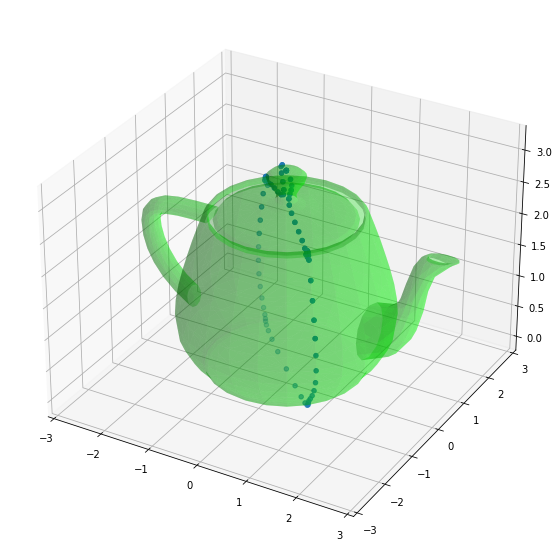

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import trimesh

mesh = trimesh.load('teapot.obj')
triangles = mesh.faces
nodes = mesh.vertices

x = nodes[:,0]
y = nodes[:,2]
z = nodes[:,1]

# Section mesh by an arbitrary plane defined by its normal vector and origin
section = mesh.section([1,0,1], [0,0,0])

fig = plt.figure(figsize=(10, 10))    

ax = plt.axes(projection="3d")
ax.plot_trisurf(x, y, z, triangles=triangles, color=(0,1,0,0.3), alpha=0.3)
ax.scatter(section.vertices[:,0], section.vertices[:,2], section.vertices[:,1])

plt.axis([-3, 3, -3, 3])
plt.show()

# Visualise a map generated by mathematics

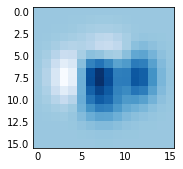

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#if we want a simpler style for plotting a surface
plt.style.use('_mpl-gallery-nogrid')

# make data x,y and define z as a function of x and y
X, Y = np.meshgrid(np.linspace(-3, 3, 16), np.linspace(-3, 3, 16))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

# plot
fig, ax = plt.subplots()

ax.imshow(Z)

plt.show()

# Two- and Three-Dimensional Plotting in Matplotlib

keywords: meshgrid, plot_surface, plot_wireframe, countour3D, scatter

## Creating a "meshgrid"

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require writing loops. This practice of replacing explicit loops with array expressions is commonly referred to as vectorization. In general, vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations.

The numpy module of Python provides meshgrid() function for creating a rectangular grid with the help of the given 1-D arrays that represent the Matrix indexing or Cartesian indexing.

Click on this link: 
    
    https://www.javatpoint.com/numpy-meshgrid

###Note: 

The purpose of np.meshgrid is already mentioned in the documentation:

np.meshgrid : https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html

* Return coordinate matrices from coordinate vectors.

* Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays x1, x2,..., xn.

So it's primary purpose is to create a coordinates matrices.

You probably just asked yourself:

Why do we need to create coordinate matrices?
The reason you need coordinate matrices with Python/NumPy is that there is no direct relation from coordinates to values, except when your coordinates start with zero and are purely positive integers. Then you can just use the indices of an array as the index. However when that's not the case you somehow need to store coordinates alongside your data. That's where grids come in.

Task:

 

Let us define a regular grid using numpy.arange

* Let us take the X-axis ranging from -5 to 5 and Y-axis ranging from -5 to 5. 

* So there are a total of (11 * 11) = 121 points marked in the figure each with a X-coordinate and a Y-coordinate. 

* For any line parallel to the X-axis, the X-coordinates of the marked points respectively are -5,-4, -3, -2, -1, 0, 1, 2, 3, 4,5. (x_vals = np.arange(start, start+n, 1))

* On the other hand, for any line parallel to the Y-axis, the Y-coordinates of the marked points from bottom to top are -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5. (y_vals = np.arange(start, start+m, 1))

* The numpy.meshgrid function returns two 2-Dimensional arrays representing the X and Y coordinates of all the points: X, Y = np.meshgrid(x_vals, y_vals)


In [7]:


import matplotlib.pyplot as plt
import numpy as np

n, m = 11, 11
start = -5

x_vals = np.arange(start, start+n, 1)
y_vals = np.arange(start, start+m, 1)
X, Y = np.meshgrid(x_vals, y_vals)

#print the values of x in each grid
#print(x_vals)
print(X)
#print(Y)

[[-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]]


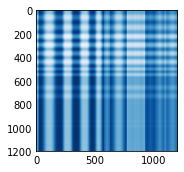

In [12]:
# Clockwise, 2D rotation matrix
import numpy as np
rot=0

pi = np.pi

#x = np.linspace(-2.*pi, 2.*pi, 1001)
#y = x.copy()

X, Y = np.meshgrid(x, y)

Xr   =  np.cos(rot)*X + np.sin(rot)*Y  # "cloclwise"
Yr   = -np.sin(rot)*X + np.cos(rot)*Y

zz = np.sin(Xr) + np.cos(Yr)


# plot
fig, ax = plt.subplots()

ax.imshow(zz)

plt.show()

Let's rotate the image by 20 degrees

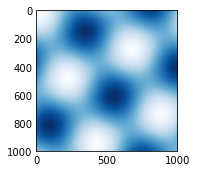

In [18]:
# Clockwise, 2D rotation matrix
import numpy as np

#rotation angle
rot=20

pi = np.pi

x = np.linspace(-2.*pi, 2.*pi, 1001)
y = x.copy()

X, Y = np.meshgrid(x, y)
#rotation matrix and the transformation:
Xr   =  np.cos(rot)*X + np.sin(rot)*Y  # "cloclwise"
Yr   = -np.sin(rot)*X + np.cos(rot)*Y
#the new mapping
zz = np.sin(Xr) + np.cos(Yr)


# plot
fig, ax = plt.subplots()

ax.imshow(zz)

plt.show()

# Mapping of Melbourne and tooltips

Creating Visualisation
I’ll be using the Python package Folium for creating the visualisation. 

In [ ]:
!pip install folium

import folium

To create a base map, simply pass your starting coordinates to Folium:


The Python code  creates the base layer of the map which opens at the center cordinates. This base layer has a tile styling of ‘OpenStreetMap’ which looks like the below. You can customise the tile set with the styling options per the Folium documentation here (and search for the tile layer class).

In [22]:
import folium
m = folium.Map(location=[-38, 145])

#To display it in a Jupyter notebook, simply ask for the object representation:

m

In [23]:
#save this in a file

m.save("index.html")


I’ll be mainly focusing on Monash Univ  and surrounded suburbs, I’ll be using coordinates for our uni and will set the zoom size to 13.

In [25]:
folium.Map(location=[-37.91, 145.132], zoom_start=17)

# Create tooltip interaction

Find us in the School of Math and a coffee shop!

Add more tooltips, add the location of your cat or house.....as a marker on the map

In [26]:
m = folium.Map(location=[-37.91, 145.132], zoom_start=16, tiles="Stamen Terrain")

tooltip = "Click me!"

folium.Marker(
    [-37.909, 145.131], popup="<i>Pythonians</i>", tooltip=tooltip
).add_to(m)

folium.Marker(
    [-37.91, 145.133], popup="<i>Coffee</i>", tooltip=tooltip
).add_to(m)



m

In [27]:
m.save('My_map.html')


Then instead of using Folium.Marker, I’m using Folium.Circle a dangerous zone (don't get closer!

In [28]:
folium.Circle(
    [-37.91, 145.133], popup="<i>Coffee</i>", tooltip=tooltip,
    radius=1000,
          color='red',
          fill=True,
          fill_color='orange',
).add_to(m)
m

Now, I am impressed.

Let’s zoom it in.

So, This is how I wanted my map to be and I’m going to include this in my report.

You can actually show more information on the tooltip
(https://towardsdatascience.com/creating-interactive-geospatial-visualisation-75a2dfaf7e59)


## Generate 3D Surface Plot
### The function f(x,y) and its 3D graphical representation using the mplot3d Toolkit

In this section we want to go over some of the basic ideas about functions of more than one variable such as: 
$f(x,y) $, a function $f$ that depends of two variables $(x,y)$ at once.

$f(x)=x^4$ is a simple function. So is this function: $f(x)=1-x-x^2$.

But $f(x,y)=x^2 +y^2$ is a new function that depends on $x$ and $y$.
The Domains of x and y has to be specified if you want to plot this function. 

When $z = f(x, y)$,  this is a surface in 3D! The height $z = f(x, y)$ over each point of (x,y) gives the value of f.
 
To generate an image like this, we first want to create x and y arrays using np.arange or np.linspace, then calculate a "height" value, z, at each point in x and y. (where z = f(x,y)) 

We will use the meshgrid to generate (x,y) pairs. The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values.

Then, we use: plot_surface().

Surface plot shows a functional relationship between a designated dependent variable (Z), and two independent variables (X and Y). The plot is a companion plot to the contour plot. A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon. This can aid perception of the topology of the surface being visualized. The plot_surface() function x,y and z as arguments.




References:
https://images.app.goo.gl/CFRs1btkS5VgUcHK6

https://www.whitman.edu/mathematics/calculus_online/section14.01.html

https://www.tutorialspoint.com/matplotlib/matplotlib_3d_surface_plot.htm

Let's plot : $f(x,y)=x^2 +y^2$ 

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def myfunction(x,y):
    return x**2+y**2

## The mplot3d Toolkit

Generating 3D plots using the mplot3d toolkit.

https://matplotlib.org/3.1.1/tutorials/toolkits/mplot3d.html

Add the mpl_toolkits.mplot3d

In [30]:
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot



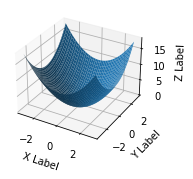

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
                   
#define z=f(x,y)
zs = np.array(myfunction(np.ravel(X), np.ravel(Y)))

Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Exercise: 

Change the colour of the plot, choose a 'hot' colour map. To do this replace:
    
ax.plot_surface(X, Y, Z)

by
    
my_cmap = plt.get_cmap('hot')
ax.plot_surface(X, Y, Z, cmap=my_cmap)

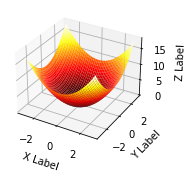

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
                   
#define z=f(x,y)
zs = np.array(myfunction(np.ravel(X), np.ravel(Y)))

Z = zs.reshape(X.shape)

my_cmap = plt.get_cmap('hot')
ax.plot_surface(X, Y, Z, cmap=my_cmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


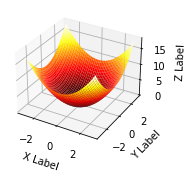

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
#define z=f(x,y)
zs = np.array(myfunction(np.ravel(X), np.ravel(Y)))

Z = zs.reshape(X.shape)

# Creating color map add 'hot'
my_cmap = plt.get_cmap('hot')
ax.plot_surface(X, Y, Z, cmap=my_cmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Gradient Surface Plot

This plot is a combination of a 3D surface plot with a 2D contour plot. In the Gradient surface plot, the 3D surface is colored same as the 2D contour plot. The parts that are high on the surface contains different color rather than the parts which are low at the surface.

The required syntax is:

ax.plot_surface(X, Y, Z, cmap, linewidth, antialiased)
where cmap is used to set the color for the surface.

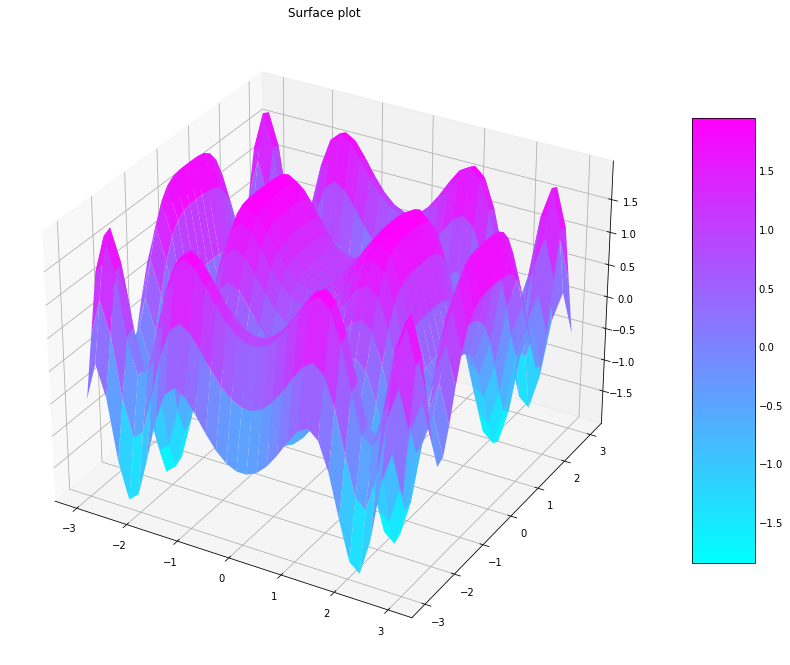

In [45]:
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 

x = np.outer(np.linspace(-3, 3, 32), np.ones(32)) 
y = x.copy().T 
z = (np.sin(x **2) + np.cos(y **2) ) 

fig = plt.figure(figsize =(14, 9)) 
ax = plt.axes(projection ='3d') 

my_cmap = plt.get_cmap('cool') 

surf = ax.plot_surface(x, y, z, cmap = my_cmap, edgecolor ='none') 

fig.colorbar(surf, ax = ax, shrink = 0.7, aspect = 7) 

ax.set_title('Surface plot') 


plt.show() 

# Fancy 3D plots

Let us plot :  $z =sin(\sqrt{ x^2  + y^2})$

So when $z = f(x, y)$,  this is a surface in 3D!

The height $z = f(x, y)$ over each point of (x,y) gives the value of f.

Wire-frame plots draw lines between nearby points. They can be displayed using the plot_wireframe method. Here we'll plot the  surface $z$:

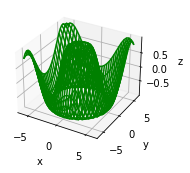

In [47]:
def z_function(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

Exercise:

Draw the graph (or surface) of the function: $z = 9 − x^2 − y
^2$ (a circular paraboloid).

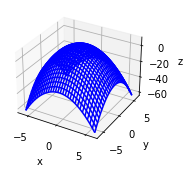

In [49]:
def z_function(x, y):
    return 9-x**2-y**2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

Exercise:

Draw the graph (or surface) of the function: $z =x^2 − y^2$  .

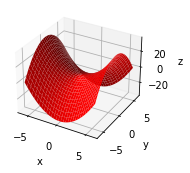

In [50]:
def z_function(x, y):
    return x**2-y**2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

Note: These plots will help you a lot when studying vector calculus and multivariable calculus.

Exercise: 

Here you will show  the  three-dimensional contour diagram of the above three-dimensional sinusoidal function. Use:

ax = plt.axes(projection='3d')

ax.contour3D(X, Y, Z, 50, cmap='binary')


In [51]:
#Solution:
    
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

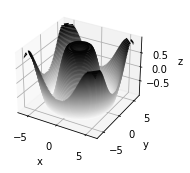

In [54]:
fig = plt.figure()

ax = plt.axes(projection='3d')

ax.contour3D(X, Y, Z, 50, cmap='binary')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

# Change the viewing angle:

Sometimes the default viewing angle is not optimal, in which case we can use the view_init method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

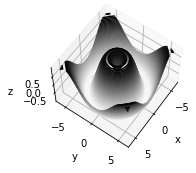

In [55]:
ax.view_init(60, 35)
fig

Again, note that this type of rotation can be accomplished interactively by clicking and dragging when using one of Matplotlib's interactive backends.

Exercise:
    
Plot in 3D  $Z = X*e^{(-X^2 - Y^2)}$ and change the viewing angle by rotating the image around the z axis by 180 degrees.

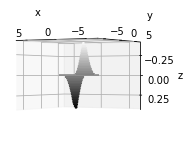

In [60]:
#Solution:
    
def f(x, y):
    return x*np.exp(-x**2-y**2)

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()

ax = plt.axes(projection='3d')

ax.contour3D(X, Y, Z, 50, cmap='binary')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(180,60)


plt.show()

# Add markers to  scatter plots

These are many markers that can be added to plot:
    
    
    'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'

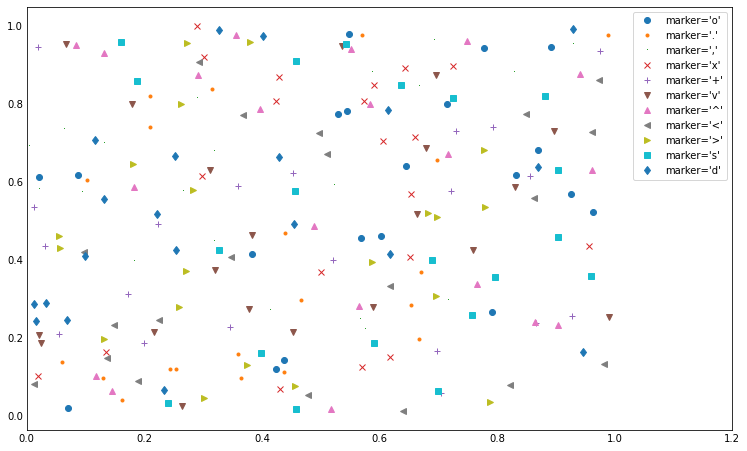

In [65]:
fig = plt.figure(figsize=(10,6))
    
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(20), rng.rand(20), marker,
                    label="marker='{0}'".format(marker))
    plt.legend(numpoints=1)
    plt.xlim(0, 1.2);

Change the size of the above figure :
    
    fig = plt.figure(figsize=(10, 10))

Add random circles with random sizes:

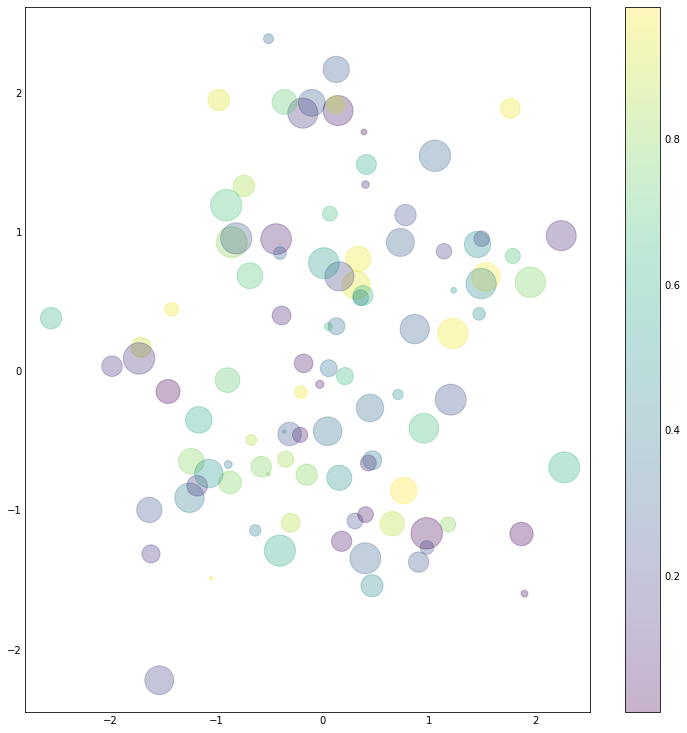

In [66]:

fig = plt.figure(figsize=(10, 10))
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,cmap='viridis')
plt.colorbar();  # show color scale

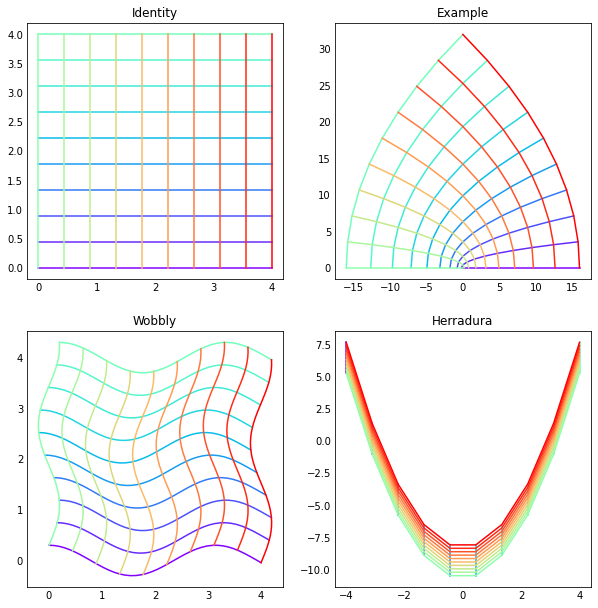

In [97]:
import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

colormap = cm.get_cmap("rainbow")


def plot_grid(
    xmin: float,
    xmax: float,
    ymin: float,
    ymax: float,
    n_lines: int,
    line_points: int,
    map_func,
):
    """
    Plot a transformation of a regular grid.

    :param xmin: Minimum x value
    :param xmax: Maximum x value
    :param ymin: Minimum y value
    :param ymax: Maximum y value
    :param n_lines: Number of lines per axis
    :param line_points: Number of points per line
    :param map_func: Function to map the grid points to new coordinates
    """
    # List for gathering the lines into.
    lines = []

    # Iterate over horizontal lines.
    for y in np.linspace(ymin, ymax, n_lines):
        lines.append([map_func(x, y) for x in np.linspace(xmin, xmax, line_points)])

    # Iterate over vertical lines.
    for x in np.linspace(xmin, xmax, n_lines):
        lines.append([map_func(x, y) for y in np.linspace(ymin, ymax, line_points)])

    # Plot all the lines.
    for i, line in enumerate(lines):
        p = i / (len(lines) - 1)  # Normalize to 0-1.
        # Transpose the list of points for passing to plot.
        xs, ys = zip(*line)
        # Get the line color from the colormap.
        plt.plot(xs, ys, color=colormap(p))


# Define some mapping functions.


def identity(x, y):
    return x, y


def example(x, y):
    c = complex(x, y) ** 2
    return (c.real, c.imag)


def wobbly(x: float, y: float):
    return x + math.sin(y * 2) * 0.2, y + math.cos(x * 2) * 0.3


def vortex(x: float, y: float):
    dst = (x - 2) ** 2 + (y - 2) ** 2
    ang = math.atan2(y - 2, x - 2)
    return math.cos(ang - dst * 0.1) * dst, math.sin(ang - dst * 0.1) * dst

def herradura(x,y):
    return y,-9.5+y**2+0.3*x


# Set up the plot surface...
plt.figure(figsize=(8, 8))
plt.tight_layout()

plt.subplot(2, 2, 1)
plt.title("Identity")
plot_grid(0, 4, 0, 4, 10, 10, identity)

plt.subplot(2, 2, 2)
plt.title("Example")
plot_grid(0, 4, 0, 4, 10, 10, example)

plt.subplot(2, 2, 3)
plt.title("Wobbly")
plot_grid(0, 4, 0, 4, 10, 40, wobbly)

plt.subplot(2, 2, 4)
plt.title("Herradura")
plot_grid(-4, 4, -4, 4, 10, 10, herradura)

plt.savefig("so71735261-2.png")
plt.show()

 

Exercise: too crowded, right? Change the size of the figure.

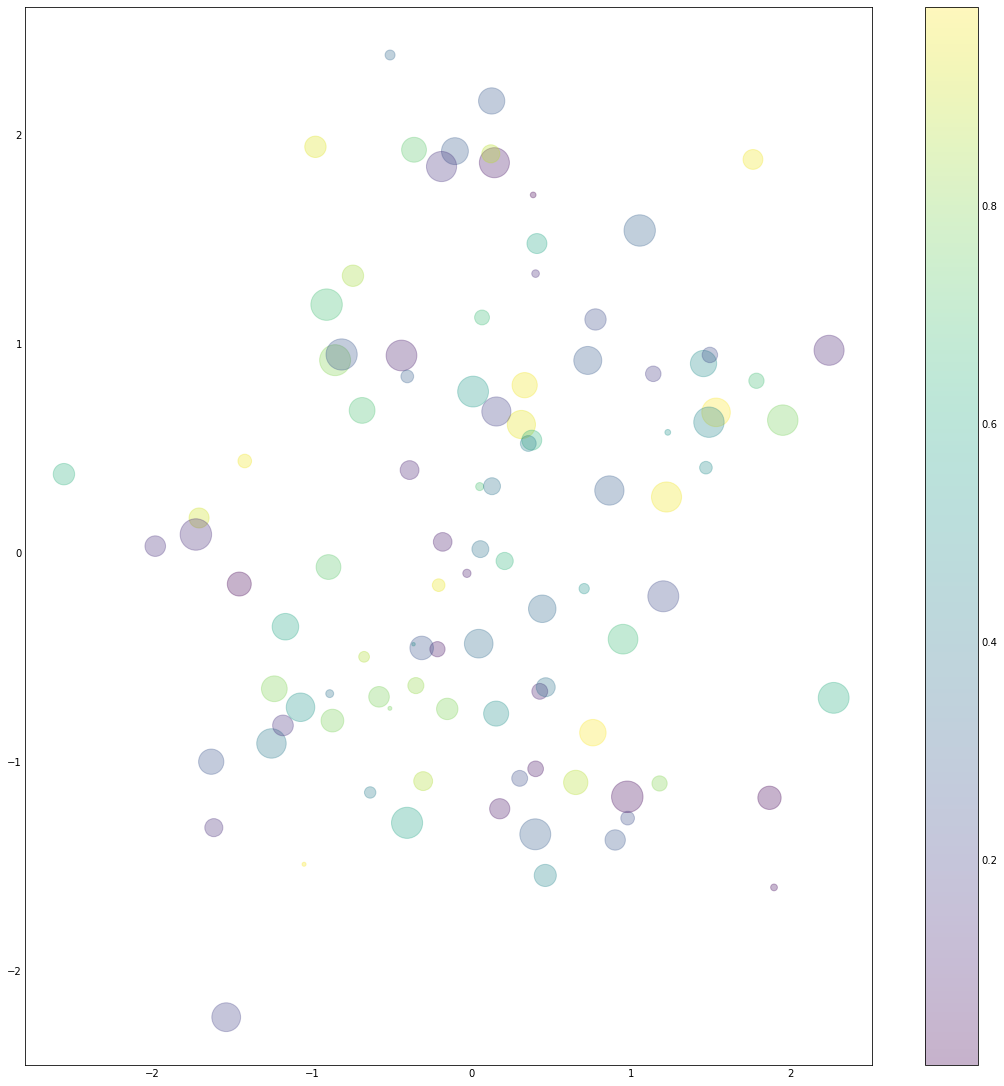

In [98]:
fig = plt.figure(figsize=(15, 15))
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,cmap='viridis')
plt.colorbar();  # show color scale

# Solar Images and Compression of Matrices

Task:
    
Import the image: https://sdo.gsfc.nasa.gov/assets/img/latest/latest_1024_0304.jpg or one of the latest 
        image of the Sun , preferably a coloured one. 
        
Use:
    

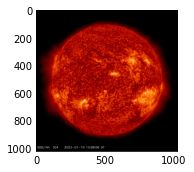

In [99]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#img=mpimg.imread('sunspot.png')    
img=mpimg.imread('latest_1024_0304.jpg')       
TheSun=plt.imshow(img)
plt.show()

In [100]:
img.shape

(1024, 1024, 3)

This is a 3-dimensional array because images are represented using RGBA values at each
pixel (red, green, blue 

In [101]:
#first image
c=img[...,0]

In [102]:
#first image
c=img[...,1]

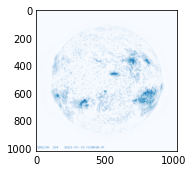

In [103]:
plt.imshow(c);

This is a 3-dimensional array because images are represented using RGBA values at each
pixel (red, green, blue and an alpha value for transparency). 

## Definition of SVD for matrices (images)


One of the early and natural ideas in software development for scientifc computation was
the idea of packaging linear algebra software around robust implementations of matrix
factorizations, divested from specifc applications. 


The SVD is a factorization of an m × n matrix A of the form
$A = U \Sigma V$
 
where $\Sigma$ is an m × n diagonal matrix, and U and V are unitary matrices of sized m × m
and n × n, respectively. (Recall that a square matrix Q is called unitary if its inverse equals
Q∗, the conjugate transpose of Q.) The diagonal entries of Σ are non-negative and positive
ones are called the singular values of A. It is a convention to list the singular values in
non-increasing order along the diagonal. The columns of U and V are called the left and
right singular vectors, respectively. 

Here is how we compute SVD using scipy. 

In [104]:
from scipy.linalg import svd
import numpy as np

Let us take the SVD of the image above (the c component) :
    
    

In [105]:
u, s, vh = svd(c)

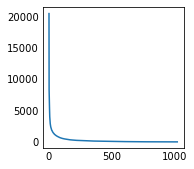

In [106]:
plt.plot(s);

Suppose A be an m × n matrix (complex or real), our image of the Sun.

You can see a sharp drop in the magnitude of the singular values. This is a good indication
that the later summands in the SVD representation of image A

$A=\sum_{j=1}^{\min (m, n)} \sigma_j u_j v_j^*$

are adding much less to A than the frst few summands. Therefore, we should be able to
represent the same A using the frst few outer products. 

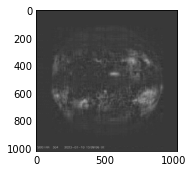

In [108]:
# Rank 20 approximation of the image: (l=20)
l = 20; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

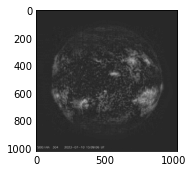

In [109]:
# Rank 50 approximation :
l = 50; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

If you increase the rank l to 100, you will find that the result is visually indistinguishable
from the original. Comparing the two previous output, we can certainly conclude that we have some compression for l=20,50. However, for image compression, there are better algorithms. 

# Coloured maps and Contour Plots

LEt us plot the function:
    
    z = 3*y*(3*x**2-y**2)/4 + .5*np.cos(6*np.pi * np.sqrt(x**2 +y**2) + np.arctan2(x,y))
    
WOW!!!

Once a  function has been sampled on a rectangular grid, the function can now be visualized as an "image". You need pylab library. Also note how the construction of a meshgrid of points is done via: (y,x = np.mgrid[-1.:1.:.01, -1.:1.:.01]). 

In [110]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show


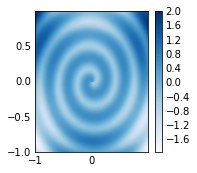

In [111]:
y,x = np.mgrid[-1.:1.:.01, -1.:1.:.01]
z = 3*y*(3*x**2-y**2)/4 + .5*np.cos(6*np.pi * np.sqrt(x**2 +y**2) + np.arctan2(x,y))
plt.contourf(x,y,z,100)
colorbar()

Note: The value 100 in the contourf function determines the number of different coloured contours to plot.  If you reduce this to, for example, 10 then the plot becomes less smooth.

Note: As an alternative to contourf, you can use imshow.

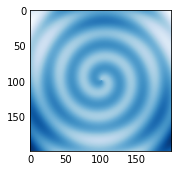

In [112]:
imshow(z)

Add a gray colour and a color bar. Note: colour bars are very important for presenting the range of values if the image.

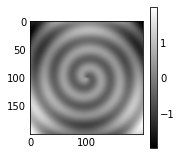

In [113]:
imshow(z, cmap=plt.cm.gray); plt.colorbar()

Add limits for your map:

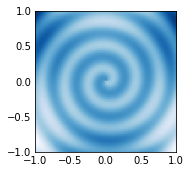

In [114]:
imshow(z, extent=[-1,1,-1,1], origin='lower', interpolation='nearest' )

Here, you need to specify the ranges of x and y using extent, and also ask the origin to be in the lower left (default is upper left). 

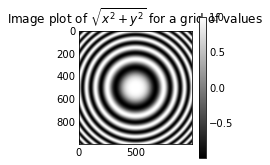

In [115]:
"""
Here I used the matplotlib function imshow to create an image plot from a 2D array of function values.
"""
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt



matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

#    matplotlib.rcParams["axes.labelsize"]="large"
#    matplotlib.rcParams["axes.linewidth"]=2.0
#    matplotlib.rcParams["xtick.major.size"]=8
#    matplotlib.rcParams["ytick.major.size"]=8
#    matplotlib.rcParams["ytick.minor.size"]=5
#    matplotlib.rcParams["xtick.labelsize"]="large"
#    matplotlib.rcParams["ytick.labelsize"]="large"

##################################################
# Define our surface
##################################################

# Generate data:
points = np.arange(-5, 5, .01) # 1000 equally spaced points

# Set up a regular grid of interpolation points
xs, ys = np.meshgrid(points, points)

#z = np.sqrt(xs**2 + ys**2)
z = np.cos(xs**2 + ys**2)

plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")


#save it to a file
plt.savefig("image.png")


plt.show()



### Contour Plots and Level Curves

 If $f$ = height, level curves are contours on a contour map. If $f$ = air pressure, level
curves are the isobars on a weather map.

The graph of $f$ can be built up from the level sets: The slice at height $z = c$, is the level set $f(x, y) =c$.

Contour plot is a collection of level curves. Every level curve (or sometimes named a contour line) in a contour plot is drawn for different value of z, each value a constant.

Applications of Contour Plots:

* A contour plot in cartography represents levels of equal elevation with respect to a base level.
 

* A contour line that connects places with the same temperature is called an isotherm. Remember, a level curve of f(x,y) has the same value z in all the points of x,y that curve passes through
 

* If a level curve is to be drawn for ocean depth where the ocean depth is the same on the places it connects it is called an isobath.


Drawing a Contour Plot using Python and Matplotlib:

* Create a list of x points
 

* Create a list of y points
 

* From x and y form a matrix of z values.
 

* Call the contour() function of matplotlib.pyplot module and display the plot.
 
 
 
We'll start by demonstrating a contour plot using a function $z=f(x,y)$, using the following particular choice for our functions:

* A simple countour plot of a function of two variables:

function_X_Y = 9-X^2-Y^2

and later 

function_X_Y =(1-(X**2+Y**3))*np.exp(-(X**2+Y**2)/2)

* Another simple function:

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
    

Example 1:

In [116]:
# functions to be plotted
def z_func(a, b):
    return 9-a**2-b**2 



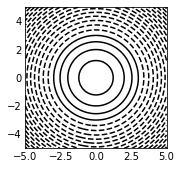

In [117]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y)
Z = z_func(X, Y)

#look at this with a standard line-only contour plot:

plt.contour(X, Y, Z, 20, colors='black');

This contour plot shows that the surface is symmetric and peaks in the center.

or try this:

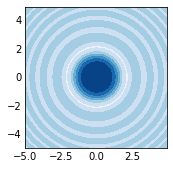

In [118]:
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)
plt.show()

Exercise: Follow example above to plot the countour plots for the function f(z,y):

In [119]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Exercise: Try this: 
    
    plt.contour(X, Y, Z, 20, cmap='RdGy');
    
    plt.contourf(X, Y, Z, 20, cmap='RdGy')
    plt.colorbar();
    
    #The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."
    
    

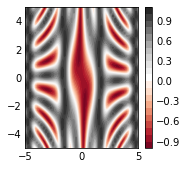

In [120]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, 20, cmap='RdGy');

plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

### Contour plots with labels for displaying this sort of three-dimensional data within a two-dimensional plot.



The combination of these three functions—plt.contour, plt.contourf, and plt.imshow—gives nearly limitless possibilities for displaying this sort of three-dimensional data within a two-dimensional plot. 


    
contours = plt.contour(X, Y, Z, 3, colors='black')

plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
           
plt.colorbar();


Example 2:

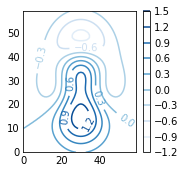

In [121]:
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x,y)


function_X_Y =(1-(X**2+Y**3))*np.exp(-(X**2+Y**2)/2)

cs = plt.contour(function_X_Y)
plt.colorbar(cs)

plt.clabel(cs)
plt.show()

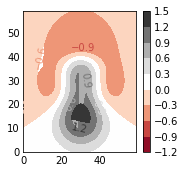

In [122]:
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x,y)


function_X_Y =(1-(X**2+Y**3))*np.exp(-(X**2+Y**2)/2)

cs = plt.contourf(function_X_Y, cmap='RdGy')
plt.colorbar(cs)

plt.clabel(cs)
plt.show()

In this post we will see how to visualize a function of two variables in two ways. First, we will create an intensity image of the function and, second, we will use the 3D plotting capabilities of matplotlib to create a shaded surface plot. So, let's go with the code:

# Stream plot of two point charges

Stream plot of two point charges
Finally, we will build a stream plot to demonstrate the electric field due to two point charges. The electric field at any point on a 2D surface depends on the position and distance relative to the two point charges.

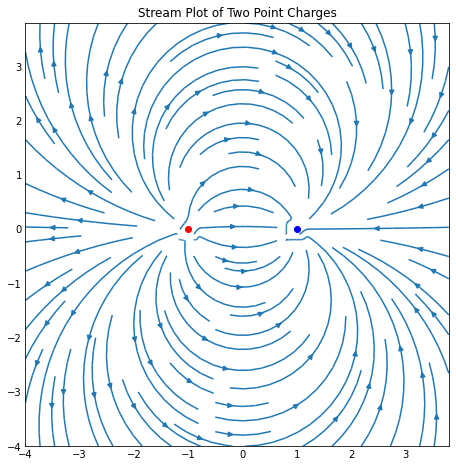

In [123]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
#%matplotlib inline

x = np.arange(-4,4,0.2)
y = np.arange(-4,4,0.2)


X,Y = np.meshgrid(x,y)
Ex = (X + 1)/((X+1)**2 + Y**2) - (X - 1)/((X-1)**2 + Y**2)
Ey = Y/((X+1)**2 + Y**2) - Y/((X-1)**2 + Y**2)


fig, ax = plt.subplots(figsize=(6,6))


ax.streamplot(X,Y,Ex,Ey)


ax.set_aspect('equal')
ax.plot(-1,0,'-or')
ax.plot(1,0,'-ob')
ax.set_title('Stream Plot of Two Point Charges')


plt.show()

# 3D Surface plots created with Matplotlib can be projected onto 2D surfaces. 

Below is a code section that creates a 3D surface plot. The projections of the 3D surface are visualized on 2D contour plots.

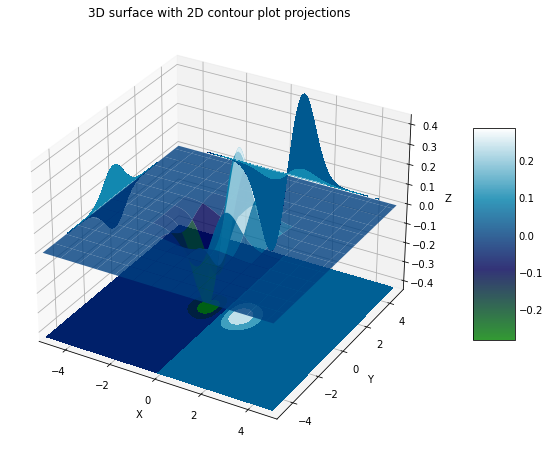

In [124]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = X*np.exp(-X**2 - Y**2)


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')


surf = ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.8, cmap=cm.ocean)
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z), cmap=cm.ocean)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-5, cmap=cm.ocean)
cset = ax.contourf(X, Y, Z, zdir='y', offset=5, cmap=cm.ocean)


fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)


ax.set_xlabel('X')
ax.set_xlim(-5, 5)
ax.set_ylabel('Y')
ax.set_ylim(-5, 5)
ax.set_zlabel('Z')
ax.set_zlim(np.min(Z), np.max(Z))
ax.set_title('3D surface with 2D contour plot projections')


plt.show()

# Three-dimensional Points and Curves

3D plotting in Matplotlib starts by enabling the utility toolkit. We can enable this toolkit by importing the mplot3d library, which comes with your standard Matplotlib installation via pip. 


Once this sub-module is imported, 3D plots can be created by passing the keyword projection="3d" to any of the regular axes creation functions in Matplotlib.

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples. In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ax.plot3D and ax.scatter3D functions. 



Example:

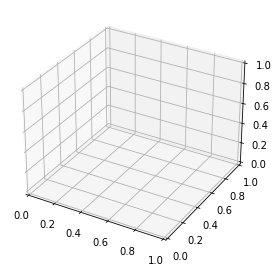

In [125]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

plt.show()

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types.

The 3D plotting functions are quite intuitive: instead of just scatter we call scatter3D , and instead of passing only x and y data, we pass over x, y, and z. All of the other function settings such as colour and line type remain the same as with the 2D plotting functions.

Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can use 

* %matplotlib notebook 

rather than

* %matplotlib inline 

when running this code.

Here’s an example of plotting a 3D line and 3D points.

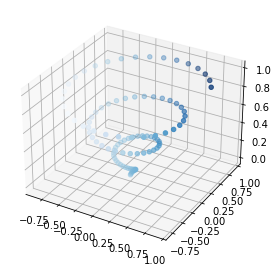

In [126]:
fig = plt.figure()
ax = plt.axes(projection='3d')

z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)

c = x + y

ax.scatter(x, y, z, c=c)

Example using random points jumping off the spiral.

np.random.random

(https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.random.html)

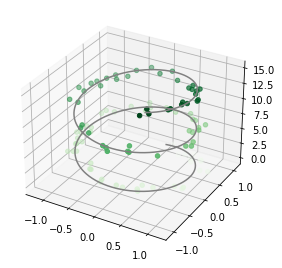

In [127]:

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
#The data are generated to randomly wonder around the main
# sin or cos values with a small deviation of amplitude 0.1

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
show()

Exercise: Remove "+ 0.1 * np.random.randn(100)" and see what happens.

Exercise: Increase the randomness amplitude of the data points 3 times,
    and plot the graph again using cmap='hsv'

Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page. This is why I like python!

Here’s the most awesome part about plotting in 3D: interactivity. The interactivity of plots becomes extremely useful for exploring your visualised data once you’ve plotted in 3D. Check out some of the different views I created by doing a simple click-and-drag of the plot!



 
Note: The 3D plots are interactive. 
You can rotate the view by click and dragging on the plot, 
if you work using a terminal and python. 

Example:

And now we are going to do the same again, we use the values stored in X,Y and Z to make a 3D plot using the mplot3d toolkit. Here's the snippet:

#Plotting figures

/tmp/ipykernel_12831/1483944242.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


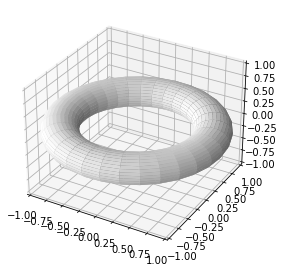

In [128]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Generate torus mesh
angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
r, R = .25, 1.
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

# Display the mesh
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(X, Y, Z, color = 'w', rstride = 1, cstride = 1)
plt.show()

# Group working assessment: The  Exit Ticket

Task 1: Generate two arrays X ranging from -4 to 4 and 
Y ranging from -5 to 5. 

 numpy.linspace shoud create an array of 
 9 linearly placed elements between  -4 and 4, both inclusive 

So there are a total of (9 * 11) = 99 points  
each with a X-coordinate and a Y-coordinate. 

Use X and Y  for plotting a contour plot  of an ellipse X^2+4 Y^2 = 0 
within the given coordinate range. Use contourf().

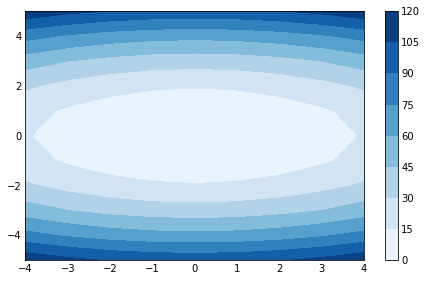

In [144]:
y,x = np.mgrid[-5.:6.:1, -4.:5.:1]
z = x**2+4*y**2
plt.contourf(x,y,z,10)
colorbar()
plt.show()

Task 2: 
    
Import the image: https://sdo.gsfc.nasa.gov/assets/img/latest/latest_1024_0304.jpg or one of the latest 
        image of the Sun , preferably a coloured one. 
        
Then choose some images of a mountain or anything that is a jpg file, which we will blend together with the Sun's image.
    

In [145]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


uint8


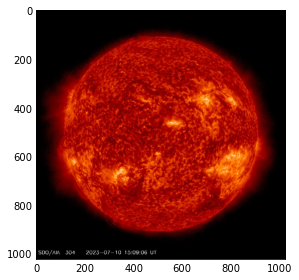

In [146]:
img=mpimg.imread('latest_1024_0304.jpg')    
print(img.dtype)
plt.imshow(img)
plt.show()

If you want to blend the  two images,  or any other two images, then you can do that too. Check the below code

img = np.array(Image.open('first image.jpg'))
img0 = np.array(Image.open('secondimage.jpg').resize(img.shape[1::-1])) # resize takes 2 arguments (WIDTH, HEIGHT)
print(img.dtype)
# uint8

#the new image is dst and is made of adding contributions of 0.6 and 0.4 from images. Try it.

dst = (img * 0.6 + img0 * 0.4).astype(np.uint8)   # Blending them in
plt.figure(figsize=(10, 10))
plt.imshow(dst)

(1024, 1024, 3)


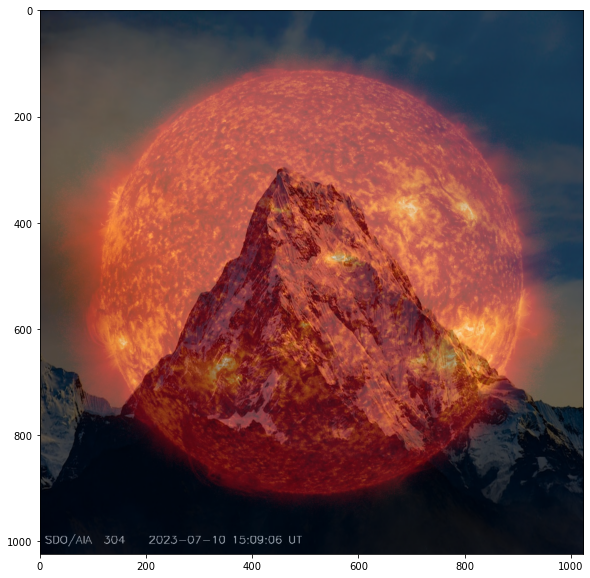

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img = np.array(Image.open('latest_1024_0304.jpg')) 
img0 = np.array(Image.open('mountain.jpg').resize(img.shape[1::-1])) # resize takes 2 arguments (WIDTH, HEIGHT) print(img.dtype)
print(img0.shape)
dst = (img * 0.6 + img0 * 0.4).astype(np.uint8)
plt.figure(figsize=(10, 10)) 
plt.imshow(dst)
plt.show()

Task 3: Correct the code to plot a countour plot for $f(x,y)=x^3+y^3-2 x -y$, between [-2,2] for x and y. 
Add labels on contours and a colour bar.

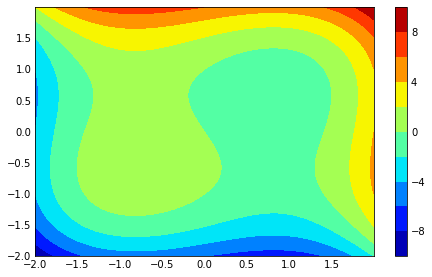

In [154]:
import matplotlib.pyplot as plt;
import numpy as np
from matplotlib import cm

x = np.arange(-2, 2, 0.001)
y = np.arange(-2, 2, 0.001)
X, Y = np.meshgrid(x,y)


function_X_Y = X**3 + Y**3 - 2*X - Y


plt.contourf(X,Y,function_X_Y,10, cmap=cm.jet)
colorbar()
plt.show()
